Text(0.5, 1.0, 'BERT serving')

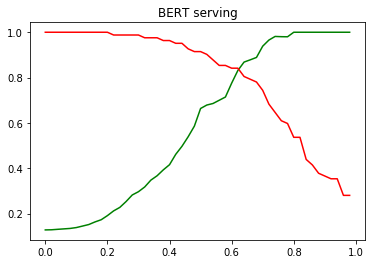

In [2]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
with open("../data/pred_true.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
diff_scores = []
same_scores = []
for line in lines:
    groups = line.split(" ")
    label1 = groups[0][-2:-1]
    label2 = groups[1][-2:-1]
    score = float(groups[2])
    if label1 != label2:
        diff_scores.append(score)
    else:
        same_scores.append(score)
diff_scores = sorted(diff_scores)
same_scores = sorted(same_scores)

# print(diff_scores)
# print(same_scores)

h = []
v_p = []
v_r = []
for i in range(0, 100, 2):
    j = i / 100
    y = []
    y_pre = []
    for d in diff_scores:
        y.append(0)
        if d < j:
            y_pre.append(0)
        else:
            y_pre.append(1)
    for s in same_scores:
        y.append(1)
        if s < j:
            y_pre.append(0)
        else:
            y_pre.append(1)
    precision = precision_score(y, y_pre)
    recall = recall_score(y, y_pre)
    h.append(j)
    v_p.append(precision)
    v_r.append(recall)

plt.plot(h, v_p, color='green', label='training accuracy')
plt.plot(h, v_r, color='red', label='testing accuracy')
plt.title('BERT serving')
# plt.show()